# Missing value imputation: MeanMedianImputer

The MeanMedianImputer() replaces missing data by the mean or median value of the
variable. It works only with numerical variables.

We can pass a list of variables to be imputed. Alternatively, the
MeanMedianImputer() will automatically select all variables of type numeric in the
training set.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import mean_median

In [3]:
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [7]:
X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.184932
MasVnrArea     0.004892
dtype: float64

### MeanMedianImputer

The MeanMedianImputer replaces NA in numerical variables by either the mean or the median value of the variable.

#### Median

In [8]:
median_imputer = mean_median.MeanMedianImputer(imputation_method='median',
                                       variables=['LotFrontage', 'MasVnrArea'])
median_imputer.fit(X_train)

MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea'])

In [9]:
# dictionary with the mappings for each variable

median_imputer.imputer_dict_

{'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [10]:
# let's corroborate that the dictionary above contains the mean values of the variables

X_train[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    69.0
MasVnrArea      0.0
dtype: float64

In [11]:
# transform the data
train_t= median_imputer.transform(X_train)
test_t= median_imputer.transform(X_test)

# and check we no longer have NA
train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

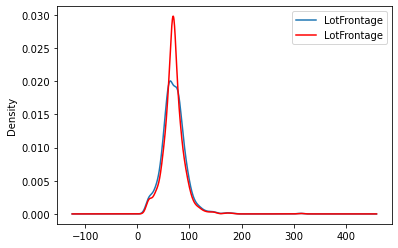

In [12]:
# we can see that the distribution has changed slightly with
# more values accumulating towards the median after the imputation

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Automatically select all numerical variables

If no variable list is indicated, the imputer will select all numerical variables in the dataset

In [13]:
mean_imputer = mean_median.MeanMedianImputer(imputation_method='mean')

mean_imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
                  variables=['MSSubClass', 'LotFrontage', 'LotArea',
                             'OverallQual', 'OverallCond', 'YearBuilt',
                             'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                             'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                             'FullBath', 'HalfBath', 'BedroomAbvGr',
                             'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                             'GarageYrBlt', 'GarageCars', 'GarageArea',
                             'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [14]:
mean_imputer.variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']